In [29]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
from sklearn.metrics import classification_report
import cv2
from japanize_matplotlib import japanize_matplotlib
japanize_matplotlib.japanize()

In [30]:
# 画像サイズ
im_rows = 64
im_cols = 64
im_color = 3
out_size = 2

In [31]:
# テストデータの作成
test_datagene = ImageDataGenerator(rescale = 1./255)
filepath_test = "static/test_images"
test_generator = test_datagene.flow_from_directory(
    directory = filepath_test
    , target_size = (im_rows, im_cols)
    , class_mode = "categorical"
    )
test_generator.class_indices

Found 40 images belonging to 2 classes.


{'cat': 0, 'dog': 1}

In [32]:
model = load_model("mybestmodel.h5")

# テストデータに対する予測結果
y_pred = model.predict(test_generator)
print(y_pred)
y_pred = np.argmax(y_pred, axis=1)
y_pred

2/2 [==============================] - 2s 83ms/step
[[0.01039117 0.9896088 ]
 [0.32503957 0.67496043]
 [0.6383459  0.3616541 ]
 [0.7231459  0.27685407]
 [0.6676689  0.33233115]
 [0.9039799  0.09602011]
 [0.5174761  0.4825239 ]
 [0.37582657 0.62417346]
 [0.17269708 0.8273029 ]
 [0.40310302 0.59689695]
 [0.72369325 0.27630672]
 [0.50128525 0.49871475]
 [0.38959336 0.6104066 ]
 [0.10462257 0.89537746]
 [0.2918847  0.70811534]
 [0.32850692 0.67149305]
 [0.530525   0.4694749 ]
 [0.5178429  0.48215714]
 [0.55414647 0.44585356]
 [0.59012383 0.4098761 ]
 [0.34860253 0.65139747]
 [0.56462175 0.43537828]
 [0.5274886  0.47251138]
 [0.5855969  0.41440308]
 [0.16941805 0.83058196]
 [0.6217006  0.3782994 ]
 [0.67531645 0.32468355]
 [0.4998356  0.50016433]
 [0.42822722 0.57177275]
 [0.43874216 0.56125784]
 [0.5739162  0.42608377]
 [0.3860716  0.61392844]
 [0.21365991 0.78634006]
 [0.69810534 0.30189472]
 [0.56061524 0.4393848 ]
 [0.49656856 0.5034314 ]
 [0.77396685 0.22603312]
 [0.49315125 0.50684875

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1], dtype=int64)

# テストデータ評価
## 混合行列のレポート

In [33]:
results = classification_report(test_generator.classes, y_pred)
print(results)

              precision    recall  f1-score   support

           0       0.52      0.55      0.54        20
           1       0.53      0.50      0.51        20

    accuracy                           0.53        40
   macro avg       0.53      0.53      0.52        40
weighted avg       0.53      0.53      0.52        40



## 画像1枚に対する評価

In [34]:
# 画像のインポート
image_path = "static/test_images/dog/dog.11085.jpg"
img = cv2.imread(image_path, cv2.IMREAD_COLOR)
print(f"変更前:{img.shape}")

img_resize = cv2.resize(src=img, dsize=(im_rows, im_cols))
print(f"変更後:{img_resize.shape}")

変更前:(374, 500, 3)
変更後:(64, 64, 3)


(-0.5, 63.5, 63.5, -0.5)

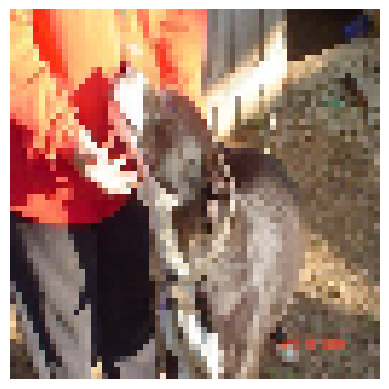

In [35]:
# 画像を表示
img_BGR2RGB = cv2.cvtColor(img_resize, cv2.COLOR_BGR2RGB)
plt.imshow(img_BGR2RGB)
plt.axis("off")

In [36]:
img_array = np.array([img_BGR2RGB])
print(img_array.shape)

(1, 64, 64, 3)


In [37]:
# 予測結果
pred = model.predict(img_array)
print(np.argmax(pred, axis=1))
predict_label = int(np.argmax(pred, axis=1))

if predict_label == 0:
    print("ネコ")
else:
    print("イヌ")

1/1 [==============================] - 1s 1s/step
[1]
イヌ


<BarContainer object of 2 artists>

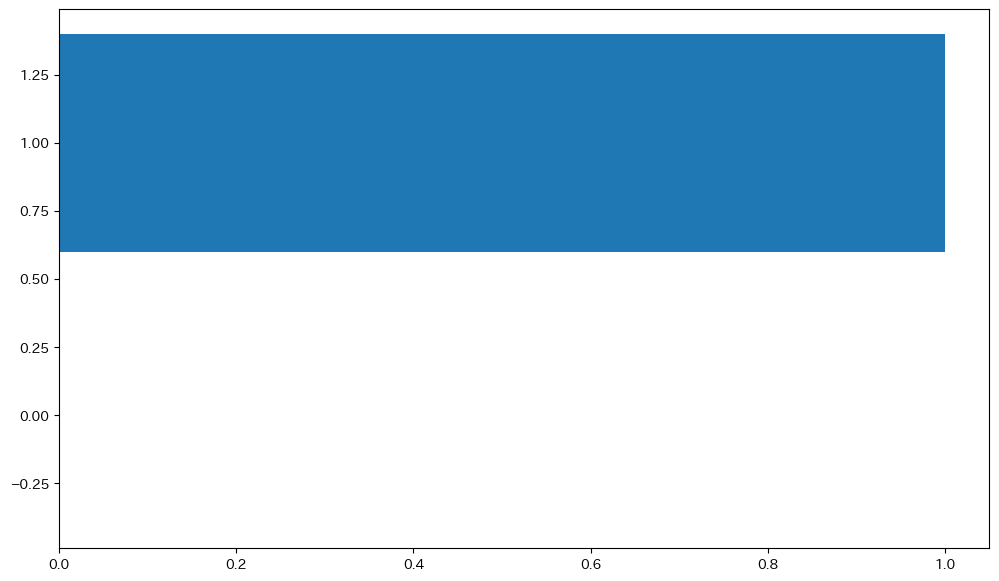

In [38]:
# 結果を可視化
plt.figure(figsize=(12, 7))
plt.barh(y = [0, 1], width = pred.reshape(-1))